# Dash-line Plots with Python (matplotlib)

This notebook shows how to use dash-line plots with [matplotlib](https://matplotlib.org) in Python.

It is licensed under Apache 2.0 with copyright by Thomas Lemberger (https://thomaslemberger.com).

### Requirements

Requirements when running offline:

- python >= 3.6.9
- matplotlib >= 3.2

If you have the repository of this notebook checked out, you can install
the python requirements with `pip install -r requirements.txt`.

### Usage
To run the code cells, select them and press `Shift+Enter`. Selection will automatically jump to the next cell.

To get more information about using Jupyter Notebooks, see [this introduction](https://medium.com/analytics-vidhya/an-introduction-to-using-jupyter-notebooks-20bce261d8a4).

## Introduction

TODO: what are dash-line plots?

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, NullLocator
import numpy as np

## Default scatter plots in matplotlib

To see the difference between the default and where we're going, let's look at the default scatter plot in matplotlib, first.

In [2]:
# Create some examplary data as running example
xs = np.random.normal(200, 200, size=400)
ys = np.random.normal(300, 100, size=400)

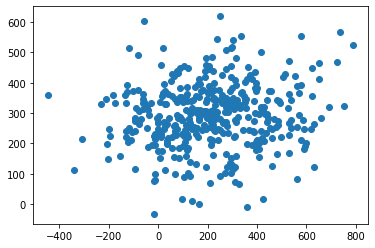

In [3]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

Issues with this:

- comparison of values is difficult because of different x- and y-axis.
- unnecessary borders
- bad data-to-ink-ratio:
    - unnecessary borders
    - filled circles (also makes it difficult to see distinctive data-points if they are close to each other)

### 1. Improve data-to-ink ratio

First of all, we can improve the data-to-ink ratio:
- remove unnecessary borders
- don't fill circles

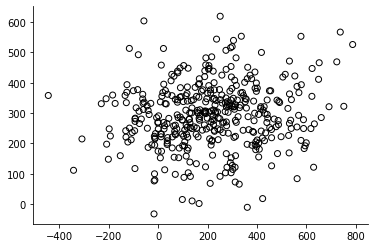

In [4]:
fig, ax = plt.subplots() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(xs, ys, facecolors='none', edgecolors='black')

### 2. Equal axes

Next, we can make comparison between the values a bit easier:

- use the same scales for both x- and y-axis
- make axis equal size

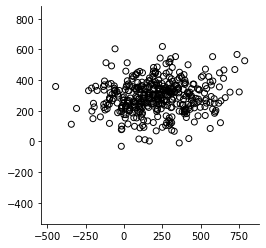

In [5]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(xs, ys, facecolors='none', edgecolors='black')

xlim_min, xlim_max = min(xs), max(xs)
ylim_min, ylim_max = min(ys), max(ys)
lim_min, lim_max = min(xlim_min, ylim_min), max(xlim_max, ylim_max)

padding = (lim_max - lim_min) * 0.075
ax.set_xlim(lim_min - padding, lim_max + padding)
ax.set_ylim(lim_min - padding, lim_max + padding)

ax.set_aspect('equal')

### 3. Axes on scale

See the difference? Now the difference in values between x-values and y-values is way more obvious. The plot before gave a wrong impression: it looked like the values are equally distributed.

In [6]:
def create_scatter_plot(xs, ys, xlabel="", ylabel="", **kwargs):
    fig, ax = plt.subplots()
    
    config = {
        'marker': 'o',
        'facecolors': 'none',
        'edgecolor': 'black',
        'linewidth': 0.8,
    }
    config.update(kwargs)
    ax.scatter(xs, ys, **config)
    ax.set_xlabel(xlabel, labelpad=10)
    ax.set_ylabel(ylabel, labelpad=10)

    style_axes(ax, xs, ys)
    add_ticks(ax, xs, ys)
    
    fig.tight_layout()
    return fig


def style_axes(ax, xs, ys):
    xlim_min, xlim_max = min(xs), max(xs)
    ylim_min, ylim_max = min(ys), max(ys)
    lim_min, lim_max = min(xlim_min, ylim_min), max(xlim_max, ylim_max)
    
    padding = (lim_max - lim_min) * 0.075
    ax.set_xlim(lim_min - padding, lim_max + padding)
    ax.set_ylim(lim_min - padding, lim_max + padding)
    
    ax.spines['left'].set_bounds(low=ylim_min, high=ylim_max)
    ax.spines['bottom'].set_bounds(low=xlim_min, high=xlim_max)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_aspect('equal')

    
def add_ticks(ax, xs, ys, average_func=None):
    if not average_func:
        average_func = np.mean
    ax.set_xticks([min(xs), average_func(xs), max(xs)])
    ax.set_yticks([min(ys), average_func(ys), max(ys)])

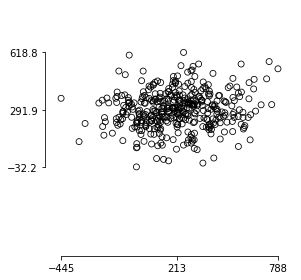

In [7]:
fig = create_scatter_plot(xs, ys)

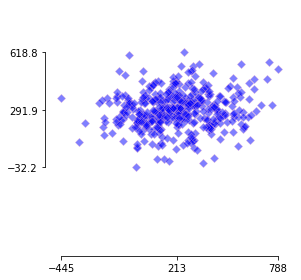

In [8]:
fig = create_scatter_plot(xs, ys, marker='D', facecolors='blue', edgecolor='pink', linewidth=0.5, alpha=0.5)

### 4. Dash-line plot

TODO: explanation of visualization

In [9]:
def create_scatter_plot(xs, ys, xlabel="", ylabel="", **kwargs):
    fig, ax = plt.subplots()
    
    config = {
        'marker': '+',
        'facecolors': 'black',
        'edgecolor': 'black',
        'linewidth': 0.8,
    }
    config.update(kwargs)
    ax.scatter(xs, ys, **config)
    ax.set_xlabel(xlabel, labelpad=10)
    ax.set_ylabel(ylabel, labelpad=10)

    style_axes(ax, xs, ys)
    add_ticks(ax, xs, ys)
    
    fig.tight_layout()
    return fig


def style_axes(ax, xs, ys):
    xlim_min, xlim_max = min(xs), max(xs)
    ylim_min, ylim_max = min(ys), max(ys)
    lim_min, lim_max = min(xlim_min, ylim_min), max(xlim_max, ylim_max)
    
    padding = (lim_max - lim_min) * 0.075
    ax.set_xlim(lim_min - padding, lim_max + padding)
    ax.set_ylim(lim_min - padding, lim_max + padding)
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_aspect('equal')

    
def add_ticks(ax, xs, ys, average_func=None):
    if not average_func:
        average_func = np.mean
    xsorted = np.sort(xs)
    ysorted = np.sort(ys)
    ax.tick_params(which='both', width=1, length=2)
    ax.set_xticks([xsorted[0], average_func(xs), xsorted[-1]])
    ax.set_yticks([ysorted[0], average_func(ys), ysorted[-1]])
    ax.set_xticks(xsorted, minor=True)
    ax.set_yticks(ysorted, minor=True)

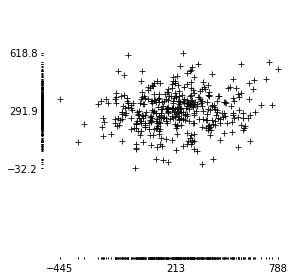

In [10]:
fig = create_scatter_plot(xs, ys)